In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance

In [2]:
#%% Cargar base de datos: "Breast Cancer Wisconsin" (diagnóstico de cáncer)
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Variable dependiente: 1 = maligno, 0 = benigno
df = X.copy()            # hacemos una copia para no modificar X directamente
df['target'] = y 

In [3]:
#%% Análisis exploratorio
df.dtypes
#%%
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
#%%
def dqr(data):

    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Name'],
                           index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes,columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['N/A value'])
    presval = pd.DataFrame(data.count(),
                                  columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean =pd.DataFrame(data.mean(), columns=['Mean'])
    Std =pd.DataFrame(data.std(), columns=['Std'])
    Var =pd.DataFrame(data.var(), columns=['Var'])
    median =pd.DataFrame(data.median(), columns=['Median'])

    skewness = pd.DataFrame(data.skew(), columns=['Skewness'])
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis'])

    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass

    # Juntar todas las tablas
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)
resumen = dqr(df)

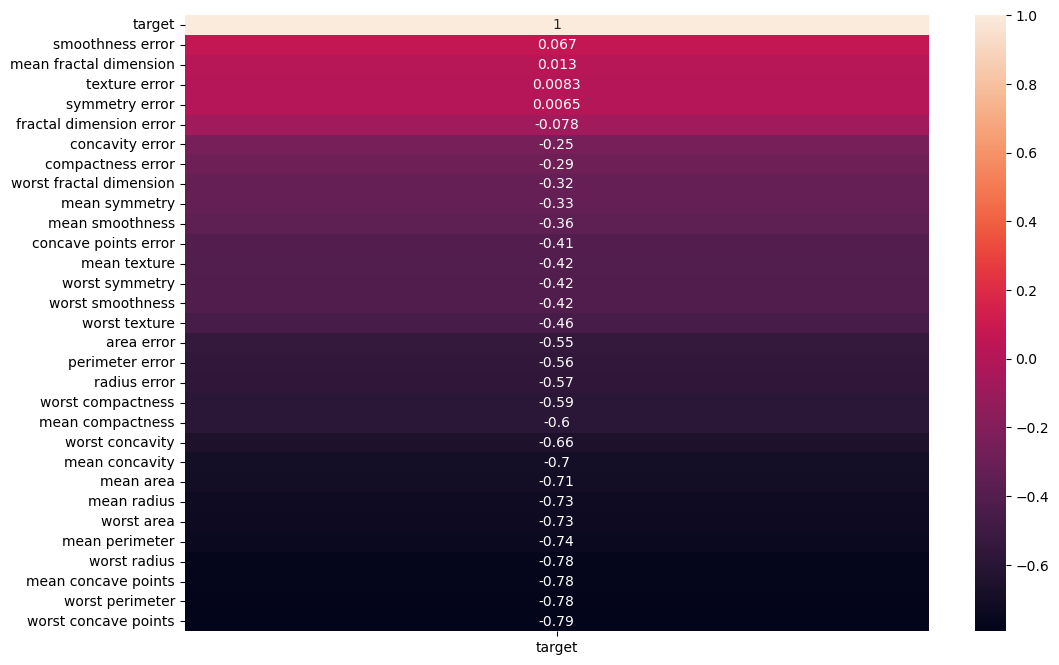

In [5]:
#%% Visualización
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[["target"]].sort_values(by="target", ascending=False), annot=True)
plt.show()

In [6]:
#%% Selección de variables predictoras (Ejemplo: Tomamos solo 5 características para facilitar visualización)
X = X[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]


In [7]:
#%% División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#%% Modelo de regresión logística con scikit-learn
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva



In [9]:
#%% Coeficientes del modelo
print("Coeficientes del modelo:", log_reg.coef_)
print("Intercepto:", log_reg.intercept_)



Coeficientes del modelo: [[ 2.5981986  -0.23394028 -0.62290476  0.00645434 -0.43956631]]
Intercepto: [21.74228895]


In [10]:
#%% Evaluación del Modelo
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")

Exactitud (Accuracy): 0.9298
Precisión (Precision): 0.9565
Sensibilidad (Recall): 0.9296
F1-Score: 0.9429
AUC-ROC: 0.9882


In [11]:
#%% Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[40  3]
 [ 5 66]]


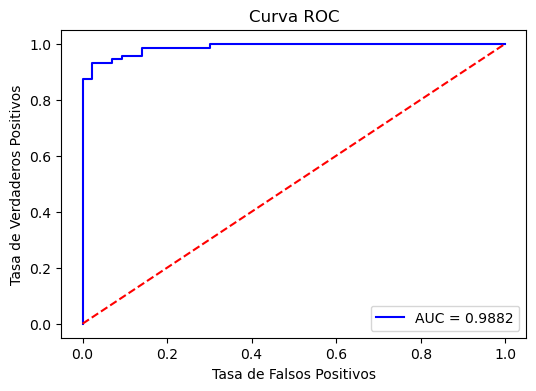

In [12]:
#%% Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [13]:
#%% Modelo con statsmodels para análisis detallado
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
modelo_sm = sm.Logit(y_train, X_train_sm).fit()
print(modelo_sm.summary())

Optimization terminated successfully.
         Current function value: 0.159714
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  455
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.7579
Time:                        22:21:47   Log-Likelihood:                -72.670
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                 4.104e-96
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.0239      8.751      1.603      0.109      -3.128      31.175
mean radius  

In [14]:
#%% Evaluación del Modelo
y_pred_prob_sm = modelo_sm.predict(X_test_sm)
y_pred_sm = (y_pred_prob_sm >= 0.5).astype(int)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")



Exactitud (Accuracy): 0.9298
Precisión (Precision): 0.9565
Sensibilidad (Recall): 0.9296
F1-Score: 0.9429
AUC-ROC: 0.9882


In [15]:
#%% Análisis de Residuos
residuos = modelo_sm.resid_pearson

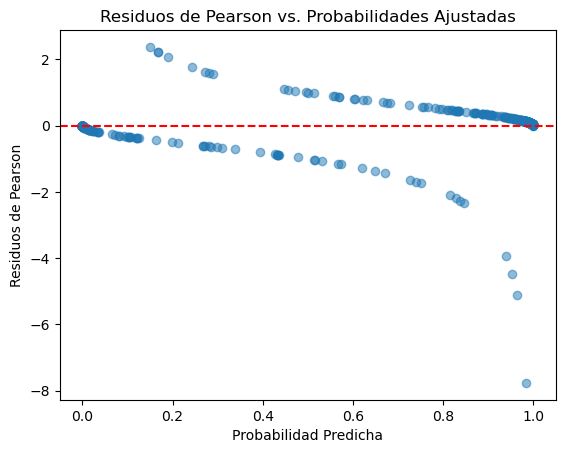

'\nValores extremos indican mal ajuste del modelo en esas observaciones.\n'

In [16]:
#%% Gráfico de residuos de Pearson vs. probabilidades predichas
plt.scatter(modelo_sm.predict(X_train_sm), modelo_sm.resid_pearson, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Residuos de Pearson")
plt.title("Residuos de Pearson vs. Probabilidades Ajustadas")
plt.show()
'''
Valores extremos indican mal ajuste del modelo en esas observaciones.
'''

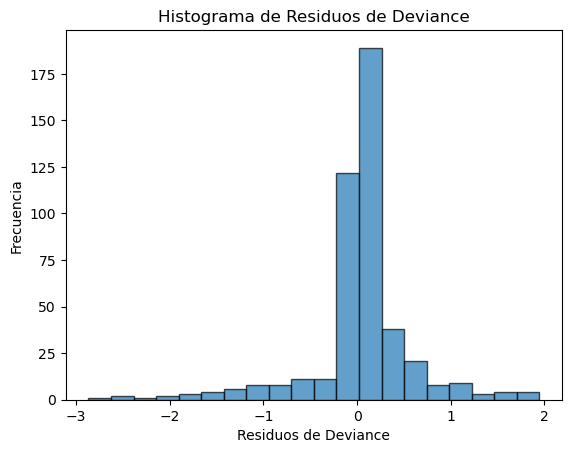

'\nMide qué tan lejos está una observación de su predicción.\nÚtil para detectar outliers.\n'

In [17]:
#%% Graficar residuos de deviance
plt.hist(modelo_sm.resid_dev, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histograma de Residuos de Deviance")
plt.xlabel("Residuos de Deviance")
plt.ylabel("Frecuencia")
plt.show()
'''
Mide qué tan lejos está una observación de su predicción.
Útil para detectar outliers.
'''

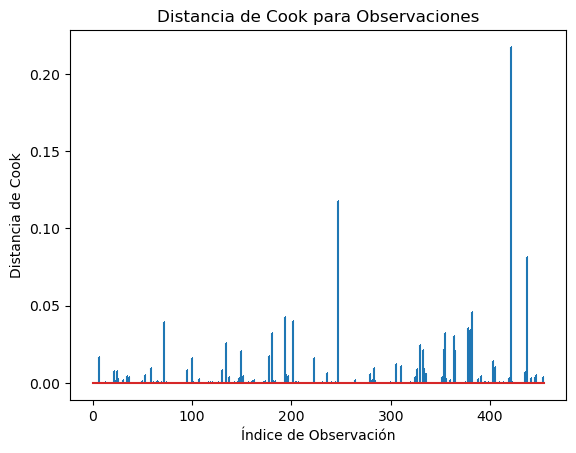

'\nInterpretación:\nValores altos → Observaciones influyentes que pueden estar afectando el modelo.\n'

In [18]:
#%% Calcular influencia y distancia de Cook
infl = modelo_sm.get_influence()
cooks_d = infl.cooks_distance[0]

# Graficar
plt.stem(cooks_d, markerfmt=",")
plt.title("Distancia de Cook para Observaciones")
plt.xlabel("Índice de Observación")
plt.ylabel("Distancia de Cook")
plt.show()
'''
Interpretación:
Valores altos → Observaciones influyentes que pueden estar afectando el modelo.
'''

In [19]:
#%% Feature importance
names = X_train.columns.to_list()
labels = np.concatenate([names])

perm_importance_random_f = permutation_importance(log_reg, X_train, y_train)

perm_feature_importance = pd.DataFrame({'predictor': labels,
                                  'Random Forest': perm_importance_random_f.importances_mean, 
                                  }).sort_values('Random Forest', ascending = False)

perm_feature_importance


,predictor,Random Forest
2,mean perimeter,0.545495
0,mean radius,0.132308
1,mean texture,0.042198
3,mean area,0.029890
4,mean smoothness,0.002198
